# **Wilcoxon Tests**

Wilcoxon tests are a family of non-parametric statistical tests that make fewer assumptions than their parametric counterparts, such as the paired t-test and the [two-sample t-test](https://github.com/Lacerdash/Hypothesis-Testing-Confidence-Interval/tree/main/Two-sample%20t-test). The two most commonly used Wilcoxon tests are:
1. Wilcoxon Rank-Sum Test (Mann-Whitney U test)
2. Wilcoxon Signed-Rank Test

### **1. Wilcoxon Signed-Rank Test**

Used to compare two dependent (paired) groups to assess wheater their population statistics (mean, median, etc) ranks sum differ.

It works by taking the difference between the pairs of measurements, ranking these differences, and then analyzing the ranks.


#### **Assumptions:**

  - Data is continuos and ordinal (so that they can be ranked)
  - Observations are independent


### **2. Wilcoxon Rank-Sum Test (Mann-Whitney U test)**

This test is used to compare two related or paired groups to assess whether their population mean ranks differ.

It works by ranking all observations from both groups together and then comparing the sum of ranks between the two groups with the $H0$ (that their ranks sum are the same).

#### **Assumptions:**

  - Data is continuos and ordinal (so that they can be ranked)
  - Observations are independent

### **Drawbacks:**
1. Both tests do not provide an estimation of the magnitude of the difference (e.g., a confidence interval for the difference in medians), only whether the difference is statistically significant or not.

2. The power of these tests (the probability of correctly rejecting the null hypothesis when it is false) is generally less than that of the corresponding parametric tests when the parametric test assumptions are met.2

In [2]:
# Importing Libraries
from scipy import stats as stat
from sklearn import datasets
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **``Wilcoxon Singned-Rank Test``**

**Hypothesy:** Virginica sepal length (cm) median is different than versicolor sepal length (cm) median

- $H_0$: The median difference between the pairs of measurements is zero.
- $H_A$: The median difference between the pairs of measurements is not zero.

**Result:** Reject $H_0$

**Interpretation:** The test shows that the median difference between the paired measurements of sepal lengths for Virginica and Versicolor is significantly different from zero. Since the median of the before treatment is higher than the after treatment, we can infer that the treatment had an effect on the disease level.

In [3]:
# Simulating the data
np.random.seed(0)
before_treatment = np.random.normal(loc=10, scale=1, size=30)
after_treatment = before_treatment + np.random.normal(loc=-0.5, scale=1, size=30)

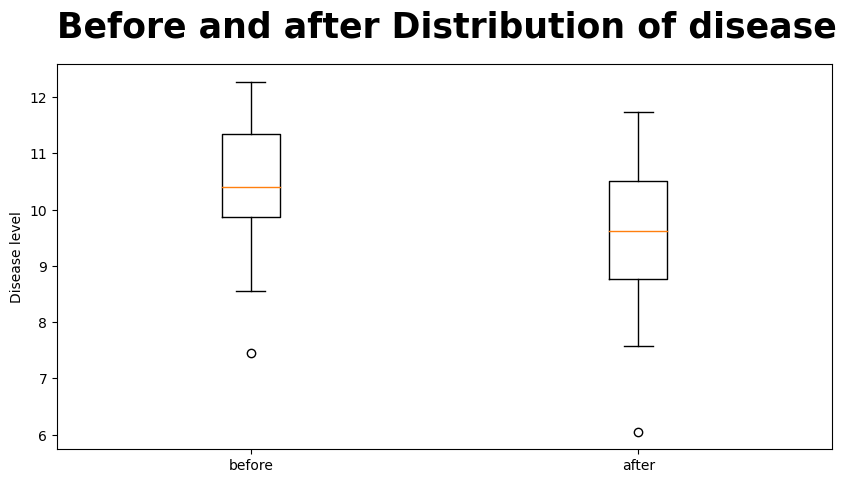

In [4]:
# Visualizing the paired data
plt.figure(figsize=(10,5))
plt.boxplot([before_treatment, after_treatment], labels=['before','after'])
plt.title('Before and after Distribution of disease', size= 25, fontweight = 'bold', loc = 'left', pad = 20)
plt.ylabel('Disease level')

plt.show()

In [5]:
from scipy.stats import wilcoxon

# Performing the Wilcoxon signed-rank test
t_stat, p_value = wilcoxon(before_treatment, after_treatment, alternative='two-sided')

print('t Statistics:', t_stat)
print('p-value:', p_value)

t Statistics: 50.0
p-value: 5.5925920605659485e-05


### **``Wilcoxon Rank-Sum Test``**

#### **Loading and Visualizing the data**

In [6]:
iris_data = datasets.load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
target_dict = {0 : 'Setosa', 1 : "versicolor", 2 : "virginica"}

data = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names)
data['target'] = iris_data.target
data['target'] = data['target'].replace(target_dict)
data = data.drop(columns = ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] )
data.head()

,sepal length (cm),target
0,5.1,Setosa
1,4.9,Setosa
2,4.7,Setosa
3,4.6,Setosa
4,5.0,Setosa


In [8]:
data.groupby('target').agg(['mean', 'median'])

sepal length (cm)       
                        mean median
target                             
Setosa                 5.006    5.0
versicolor             5.936    5.9
virginica              6.588    6.5

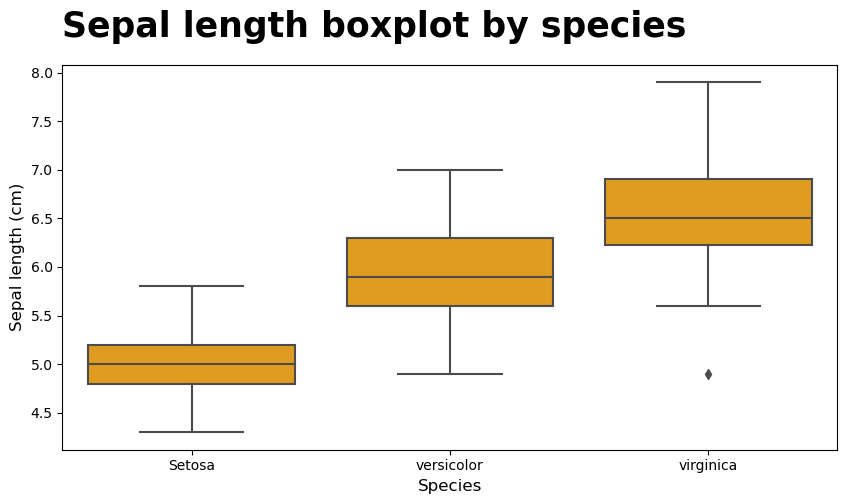

In [9]:
plt.figure(figsize=(10,5))

sns.boxplot(data = data,  x = 'target', y= 'sepal length (cm)', color = 'orange')

plt.title('Sepal length boxplot by species', size= 25, fontweight = 'bold', loc = 'left', pad = 20)
plt.ylabel('Sepal length (cm)', size= 12)
plt.xlabel('Species', size= 12)

plt.show()

#### **Wilcoxon Rank-Sum Test**

**Hypothesy:** Virginica sepal length (cm) median is different than versicolor sepal length (cm) median

- $H_0$: The medians of the two populations are equal.
- $H_A$: The medians of the two populations are not equal.

**Result:** Reject $H_0$

**Interpretation:** The median of virginica and versicolor sepal legnth are significantly different. In this case, the virginica has a higher median than the versicolor

In [10]:
# Separating the data
virginica = data[data['target'] == 'virginica']['sepal length (cm)']
versicolor = data[data['target'] == 'versicolor']['sepal length (cm)']

In [11]:
print(f'{len(virginica), len(versicolor)}')

(50, 50)


In [12]:
from scipy.stats import ranksums, mannwhitneyu

In [13]:
t_stat, p_value = ranksums(virginica, versicolor, alternative='two-sided')

print('t Statistics:', t_stat)
print('p-value:', p_value)

t Statistics: 4.99112558983095
p-value: 6.002844932496881e-07


In [14]:
t_stat, p_value = mannwhitneyu(virginica, versicolor, alternative='two-sided')

print('t Statistics:', t_stat)
print('p-value:', p_value)

t Statistics: 1974.0
p-value: 5.869006410664197e-07
